In [2]:
# import libraries required for the project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
%matplotlib inline

In [3]:
default = pd.read_csv('creditCardFraud.csv')
default.rename(columns=lambda x: x.lower(), inplace=True)
# Base values: female, other_education, not_married
default['grad_school'] = (default['education'] == 1).astype('int')
default['university'] = (default['education'] == 2).astype('int')
default['high_school'] = (default['education'] == 3).astype('int')
default.drop('education', axis=1, inplace=True)

default['male'] = (default['sex']==1).astype('int')
default.drop('sex', axis=1, inplace=True)

default['married'] = (default['marriage'] == 1).astype('int')
default.drop('marriage', axis=1, inplace=True)

# For pay features if the <= 0 then it means it was not delayed
pay_features = ['pay_0','pay_2','pay_3','pay_4','pay_5','pay_6']
for p in pay_features:
    default.loc[default[p]<=0, p] = 0

default.rename(columns={'default payment next month':'default'}, inplace=True) 

In [4]:
default.head(10)

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,0,0,0,0,1,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,1,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,0,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,0,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,10000,9000,689,679,0,0,1,0,1,1
5,50000,37,0,0,0,0,0,0,64400,57069,...,657,1000,1000,800,0,1,0,0,1,0
6,500000,29,0,0,0,0,0,0,367965,412023,...,38000,20239,13750,13770,0,1,0,0,1,0
7,100000,23,0,0,0,0,0,0,11876,380,...,0,581,1687,1542,0,0,1,0,0,0
8,140000,28,0,0,2,0,0,0,11285,14096,...,432,1000,1000,1000,0,0,0,1,0,1
9,20000,35,0,0,0,0,0,0,0,0,...,0,13007,1122,0,0,0,0,1,1,0


In [5]:
x=default.drop('default',axis=1)

In [6]:
x.head()

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
0,20000,24,2,2,0,0,0,0,3913,3102,...,689,0,0,0,0,0,1,0,0,1
1,120000,26,0,2,0,0,0,2,2682,1725,...,1000,1000,1000,0,2000,0,1,0,0,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1500,1000,1000,1000,5000,0,1,0,0,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,2019,1200,1100,1069,1000,0,1,0,0,1
4,50000,57,0,0,0,0,0,0,8617,5670,...,36681,10000,9000,689,679,0,1,0,1,1


In [7]:
y=default["default"]
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)
X_train.mean()

np.float64(0.14419993940258802)

In [10]:
# Evaluation Metrics
from sklearn import metrics


# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)

prediction = linear_regression.predict(X_test)
lr1=metrics.mean_absolute_error(y_test, prediction)
lr2=metrics.mean_squared_error(y_test, prediction)
lr3=np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('Mean Absolute Error:', lr1)
print('Mean Squared Error:', lr2)
print('Root Mean Squared Error:', lr3)

# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)

prediction = supportvector_regressor.predict(X_test)
svr1=metrics.mean_absolute_error(y_test, prediction)
svr2=metrics.mean_squared_error(y_test, prediction)
svr3=np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('Mean Absolute Error:', svr1)
print('Mean Squared Error:', svr2)
print('Root Mean Squared Error:', svr3)


Mean Absolute Error: 0.26261902583297814
Mean Squared Error: 0.1456274564331344
Root Mean Squared Error: 0.3816116565739763
Mean Absolute Error: 0.2576205320247897
Mean Squared Error: 0.14932081364343763
Root Mean Squared Error: 0.38642051400441674


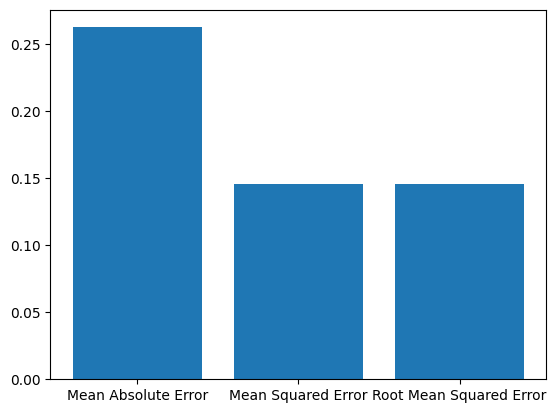

In [11]:


labels=['Mean Absolute Error','Mean Squared Error','Root Mean Squared Error']
Values=[lr1,lr2,lr2]
plt.bar(labels,Values)
plt.show()

In [12]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

prediction = decision_tree.predict(X_test)
dt1=metrics.mean_absolute_error(y_test, prediction)
dt2=metrics.mean_squared_error(y_test, prediction)
dt3=np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('Mean Absolute Error:',dt1)
print('Mean Squared Error:', dt2)
print('Root Mean Squared Error:', dt3)

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split=15
min_samples_leaf=2
random_forest = RandomForestRegressor(n_estimators = n_estimators, max_depth = max_depth, min_samples_split=min_samples_split)
random_forest.fit(X_train,y_train)

prediction = random_forest.predict(X_test)
rf1=metrics.mean_absolute_error(y_test, prediction)
rf2=metrics.mean_squared_error(y_test, prediction)
rf3=np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('Mean Absolute Error:', rf1)
print('Mean Squared Error:',rf2)
print('Root Mean Squared Error:', rf3)

Mean Absolute Error: 0.4505
Mean Squared Error: 0.4505
Root Mean Squared Error: 0.6711929677819933
Mean Absolute Error: 0.4516484484583019
Mean Squared Error: 0.21926532391121994
Root Mean Squared Error: 0.4682577537117991


In [13]:
from sklearn.linear_model import LogisticRegression


logistic_regression = LogisticRegression(n_jobs=4, random_state=15)
logistic_regression.fit(X_train, y_train)

prediction = logistic_regression.predict(X_test)
log1=metrics.mean_absolute_error(y_test, prediction)
log2=metrics.mean_squared_error(y_test, prediction)
log3=np.sqrt(metrics.mean_squared_error(y_test, prediction))
print('Mean Absolute Error:', log1)
print('Mean Squared Error:',log2)
print('Root Mean Squared Error:', log3)

Mean Absolute Error: 0.18533333333333332
Mean Squared Error: 0.18533333333333332
Root Mean Squared Error: 0.43050358109234504


In [14]:
import pickle
with open("logistic_regression","wb") as f:
    pickle.dump(logistic_regression,f)
with open("logistic_regression","rb") as f:
    lr=pickle.load(f)

In [15]:
predictions=lr.predict(X_test)


In [16]:
predictions=pd.DataFrame(predictions)
predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6000 non-null   int64
dtypes: int64(1)
memory usage: 47.0 KB


In [17]:
predictions.to_csv("default.csv")

In [18]:
predictions=lr.predict(X_test)

In [19]:
X_test.shape


(6000, 25)

In [20]:
lr.score(X_test,y_test)

0.8146666666666667

In [21]:
def client_info(limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married):

    
    data={"limit_bal": limit_bal, "age":age	,"pay_0":pay_0,	"pay_2":pay_2,	"pay_3":pay_3,	"pay_4": pay_4 ,"pay_5":pay_5,	"pay_6":pay_6, "bill_amt1":bill_amt1,"bill_amt2":bill_amt2,"bill_amt3":bill_amt3,"bill_amt4":bill_amt4,"bill_amt5":bill_amt5,"bill_amt6":bill_amt6,"pay_amt1":pay_amt1,"pay_amt2":pay_amt2,"pay_amt3":pay_amt3,"pay_amt4":pay_amt4,"pay_amt5":pay_amt5,"pay_amt6":pay_amt6,"grad_school":grad_school,	"university":university,"high_school":high_school,"male":male,"married":married	}
    
    client_info=pd.DataFrame(data,index=[0])
    print(lr.predict(client_info))

In [22]:
client_info(50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,1,0,0,1)

[0]


c:\credit_based_default_detection\Credit-Card-Default-Prediction\uenv\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [23]:
client_info

<function __main__.client_info(limit_bal, age, pay_0, pay_2, pay_3, pay_4, pay_5, pay_6, bill_amt1, bill_amt2, bill_amt3, bill_amt4, bill_amt5, bill_amt6, pay_amt1, pay_amt2, pay_amt3, pay_amt4, pay_amt5, pay_amt6, grad_school, university, high_school, male, married)>

In [24]:
lr.predict(client_info)

ValueError: Expected 2D array, got scalar array instead:
array=<function client_info at 0x000002663B4EEF70>.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.